In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [11]:
Rh1 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h1_DW.csv', index_col=0)
Rh2 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h2_DW.csv', index_col=0)
Rh3 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h3_DW.csv', index_col=0)
Rh5 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h5_DW.csv', index_col=0)
Rh6 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h6_DW.csv', index_col=0)
Rh7 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h7_DW.csv', index_col=0)
Rh9 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h9_DW.csv', index_col=0)
Rh10 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h10_DW.csv', index_col=0)
UKh1 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\UK_h1_DW.csv', index_col=0)
Rh13 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h13_DW.csv', index_col=0)
Rh15 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h15_DW.csv', index_col=0)
Rh16 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h16_DW.csv', index_col=0)
Rh18 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h18_DW.csv', index_col=0)
Rh20 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h20_DW.csv', index_col=0)
Rh21 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h21_DW.csv', index_col=0)

In [12]:
Rh1 = Rh1.values
Rh2 = Rh2.values
Rh3 = Rh3.values
Rh5 = Rh5.values
Rh6 = Rh6.values
Rh7 = Rh7.values
Rh9 = Rh9.values
Rh10 = Rh10.values
UKh1 = UKh1.values
Rh13 = Rh13.values
Rh15 = Rh15.values
Rh16 = Rh16.values
Rh18 = Rh18.values
Rh20 = Rh20.values
Rh21 = Rh21.values

In [13]:
UKh1.shape

(444, 1440)

In [14]:
combined = np.stack((Rh1,Rh2,Rh3,Rh5,Rh6,Rh7,Rh9,Rh10,Rh13,Rh15,Rh16,Rh18,Rh20,Rh21,UKh1))
combined.shape

(15, 444, 1440)

In [15]:
X_train, X_test = train_test_split(combined, test_size=0.28, random_state=1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)

(10, 444, 1440)
(5, 444, 1440)


In [16]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = X_test.shape[1:]
latent_dim = 128
autoencoder = Autoencoder(latent_dim, shape)

In [17]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [18]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
1/1 [==============================] - 11s 11s/step - loss: 0.2500 - val_loss: 0.2499
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.2499 - val_loss: 0.2495
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.2491 - val_loss: 0.2451
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.2403 - val_loss: 0.2197
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.1964 - val_loss: 0.1532
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.1230 - val_loss: 0.0827
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.0731 - val_loss: 0.0525
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.0513 - val_loss: 0.0467
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.0424 - val_loss: 0.0466
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 0.0373 - val_loss: 0.0470
Epoch 11/20
1/1 [==============================

In [19]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [20]:
decoded_imgs.shape

(5, 444, 1440)

In [21]:
print(decoded_imgs[0])

[[1.54648312e-08 5.98634697e-09 4.89134999e-09 ... 1.65707856e-08
  7.15349469e-09 5.62233327e-09]
 [5.74386272e-09 5.49510970e-09 5.40265654e-09 ... 7.98430477e-09
  1.35431821e-09 3.81337850e-09]
 [8.45736459e-09 4.24074775e-09 1.04379749e-08 ... 8.61471872e-09
  5.65403591e-09 2.97038882e-09]
 ...
 [1.14603749e-08 5.82275383e-09 3.98329725e-09 ... 9.94172744e-09
  2.95244940e-09 1.06553832e-08]
 [6.35055608e-09 7.64135066e-09 8.33520719e-09 ... 4.62617278e-09
  5.37382894e-09 5.88585314e-09]
 [6.95391966e-09 1.37631035e-08 6.17845952e-09 ... 1.60923559e-08
  5.56238744e-09 1.80295974e-08]]


In [22]:
def binary(cell):
    if cell <= 0.1:
        return 0
    elif cell >= 0.1:
        return 1

In [23]:
func = np.vectorize(binary)

In [24]:
binary0 = func(decoded_imgs[0])
binary1 = func(decoded_imgs[1])
binary2 = func(decoded_imgs[2])
binary3 = func(decoded_imgs[3])
binary4 = func(decoded_imgs[4])

In [25]:
binary = np.stack((binary0,binary1,binary2,binary3,binary4))

In [26]:
#df.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\inspect.csv')

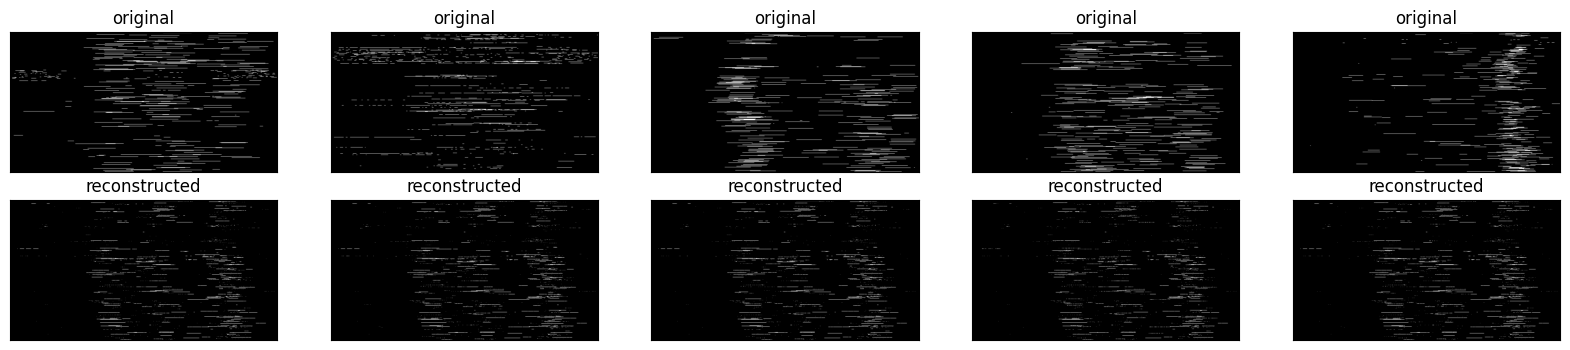

In [31]:
n = 5
plt.figure(figsize=(20,4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i], aspect= 'auto')
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

    # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(binary[i], aspect = 'auto')
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
type(decoded_imgs[0])

numpy.ndarray

In [41]:
x_pred = np.argmax(decoded_imgs, axis=1)
x_test_arg = np.argmax(X_test, axis = 1)

In [47]:
conf = confusion_matrix(X_test[0].argmax(axis=1), binary[0].argmax(axis=1))

In [50]:
conf.shape

(379, 379)